In [52]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

EDA

In [53]:
df = pd.read_csv("D:\Machinelearning\data\heart.csv")
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [54]:
print(df.columns)
print(df.isnull().sum())

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [55]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [56]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [57]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

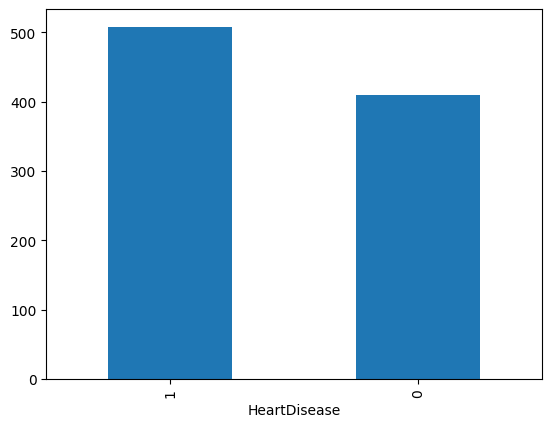

In [58]:
df["HeartDisease"].value_counts().plot(kind="bar")

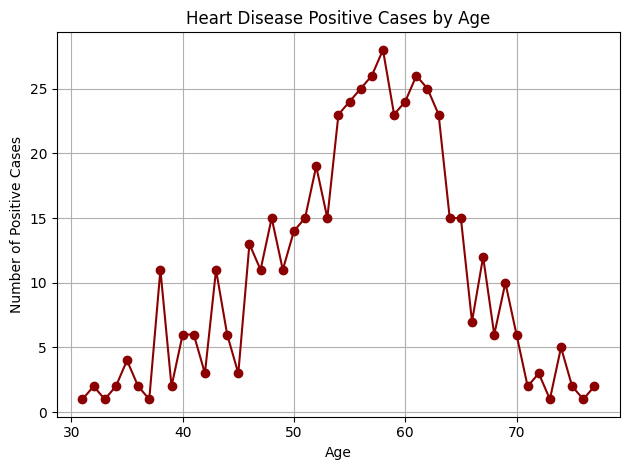

In [59]:
hd_positive = df[df["HeartDisease"] == 1]
age_counts = hd_positive["Age"].value_counts().sort_index()
# Plotting
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-', color='darkred')

plt.title("Heart Disease Positive Cases by Age")
plt.xlabel("Age")
plt.ylabel("Number of Positive Cases")
plt.grid(True)
plt.tight_layout()
plt.show()




     Age AgeGroup
0     40    40-49
1     49    40-49
2     37    30-39
3     48    40-49
4     54    50-59
..   ...      ...
913   45    40-49
914   68    60-69
915   57    50-59
916   57    50-59
917   38    30-39

[918 rows x 2 columns]


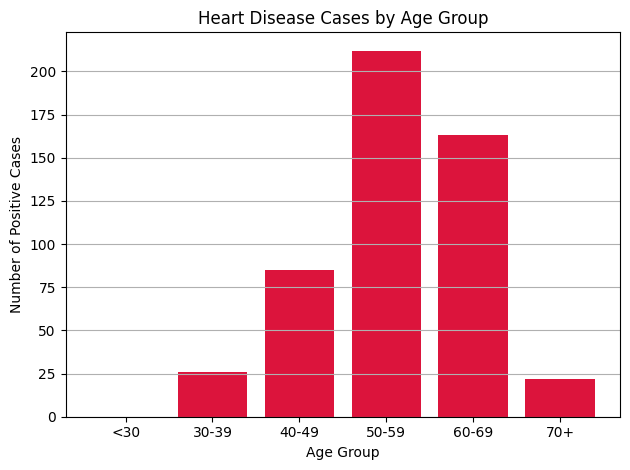

In [60]:
bins = [0, 30, 40, 50, 60, 70, 120]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df[['Age', 'AgeGroup']])
hd_positive = df[df['HeartDisease'] == 1]
age_group_counts = hd_positive['AgeGroup'].value_counts().sort_index()

# Plotting
plt.bar(age_group_counts.index, age_group_counts.values, color='crimson')

plt.title('Heart Disease Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Positive Cases')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Chest Pain Type vs Heart Disease:
 HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


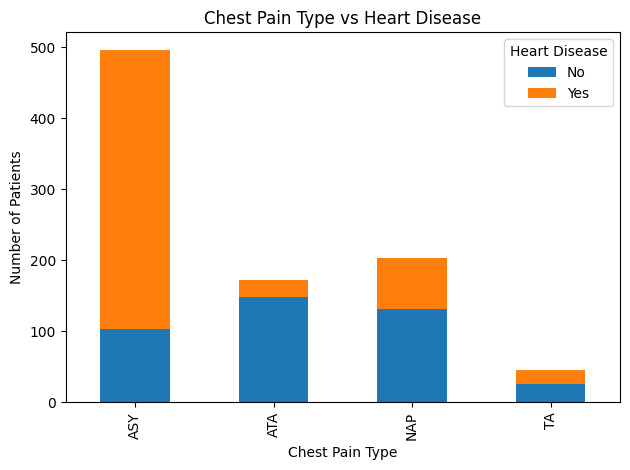

In [61]:
df["ChestPainType"].value_counts()

# Count Chest Pain Types based on presence of Heart Disease
cp_vs_hd = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack(fill_value=0)

# Display the table
print("Chest Pain Type vs Heart Disease:\n", cp_vs_hd)


# Plotting the comparison
cp_vs_hd.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()



<Axes: >

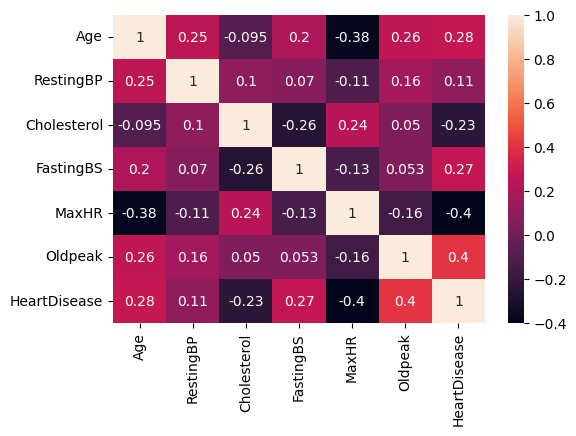

In [62]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Gender and heart disease

Sex
M    725
F    193
Name: count, dtype: int64
Sex vs Heart Disease:
 HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


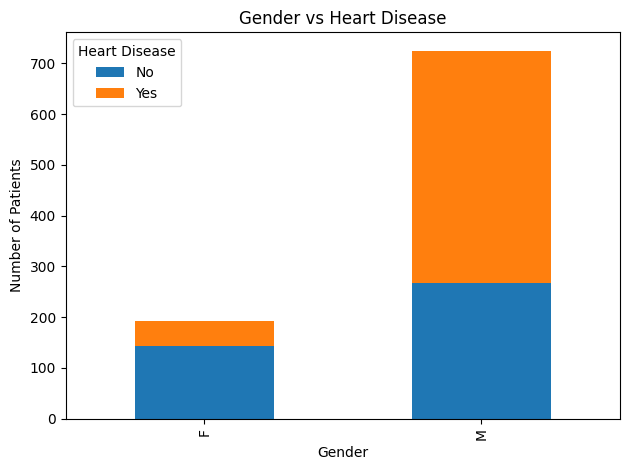

In [63]:
print(df["Sex"].value_counts())
# Count Chest Pain Types based on presence of Heart Disease
Gender_vs_hd = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)

# Display the table
print("Sex vs Heart Disease:\n", cp_vs_hd)


# Plotting the comparison
Gender_vs_hd.plot(kind='bar', stacked=True)
plt.title('Gender vs Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()


Gender,Age vs heart disease

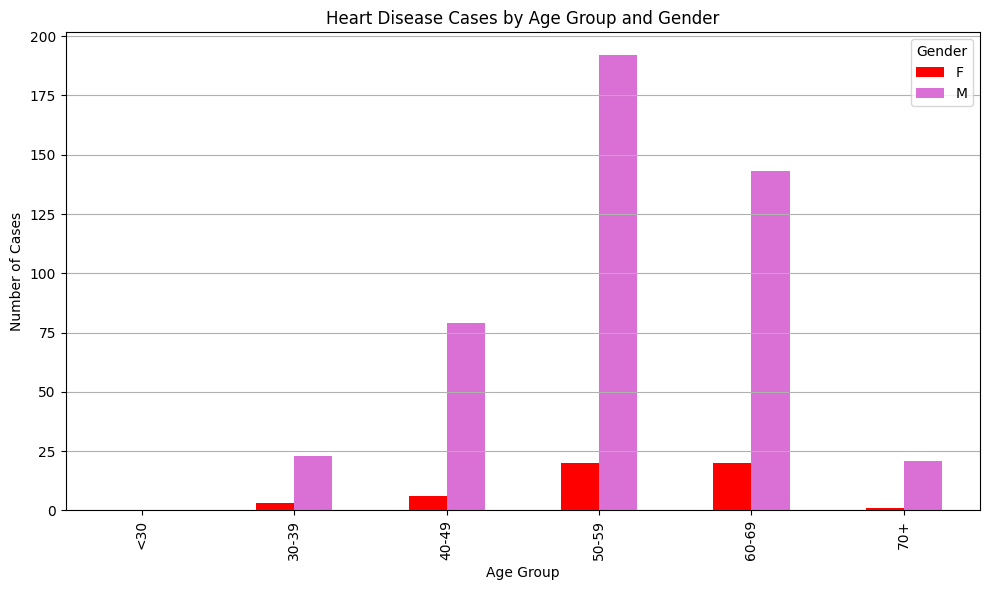

In [64]:
hd_positive = df[df['HeartDisease'] == 1]
grouped = hd_positive.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(10, 6), color=['red', 'orchid'])

plt.title('Heart Disease Cases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


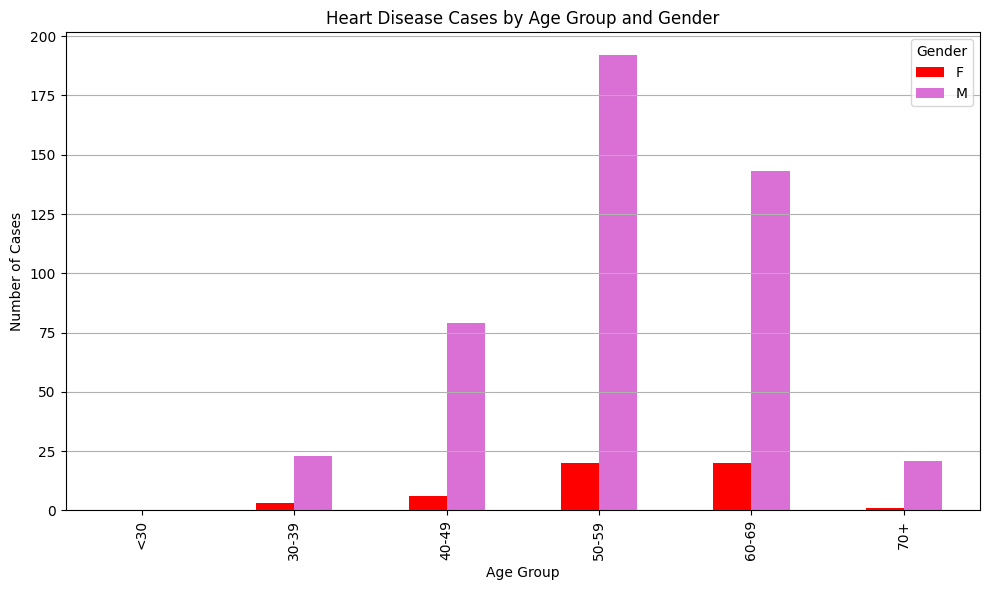

In [65]:
# Filter for rows with and without heart disease
hd_positive = df[df['HeartDisease'] == 1]
hd_negative = df[df['HeartDisease'] == 0]

# Group by AgeGroup and Sex for heart disease cases
grouped = hd_positive.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', figsize=(10, 6), color=['red', 'orchid'])

plt.title('Heart Disease Cases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


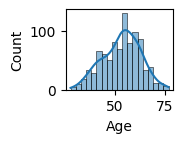

In [66]:
def plotting(var,num):
    plt.subplot(4,4,num)
    sns.histplot(df[var],kde = True)
plotting('Age',1)

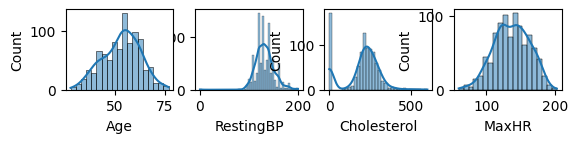

In [67]:
plotting('RestingBP',2)
plotting("Cholesterol",3)
plotting("MaxHR",4)
plotting('Age',1)



<Axes: xlabel='MaxHR'>

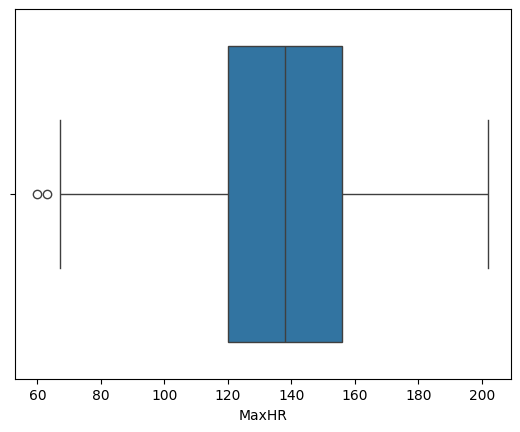

In [68]:
sns.boxplot(x = df["MaxHR"])

    